In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import pickle

In [41]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

In [43]:
out = {'Austin-to-SanDiego' :pickle.load(open('../predictions/params-lr-tf-Austin-SanDiego-all.pkl','r')),
       'SanDiego-to-Austin':pickle.load(open('../predictions/params-lr-tf-SanDiego-Austin-all.pkl','r'))}
iterations = {}
home = {}
season = {}
lr = {}
       
for stot in ['Austin-to-SanDiego', 'SanDiego-to-Austin']:
        iterations[stot] = {}
        home[stot] = {}
        season[stot] = {}
        lr[stot] = {}
        for method in ['transfer', 'normal']:
            iterations[stot][method] = {}
            home[stot][method] = {}
            season[stot][method] = {}
            lr[stot][method] = {}


            for train_percentage in [6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]:
                iterations[stot][method][train_percentage] = {}
                for iters in [100, 700, 1300]:
                    iterations[stot][method][train_percentage][iters] = 0

                home[stot][method][train_percentage] = {}
                for h in range(3,6):
                    home[stot][method][train_percentage][h] = 0

                season[stot][method][train_percentage] = {}
                for s in range(2,5):
                    season[stot][method][train_percentage][s] = 0

                lr[stot][method][train_percentage] = {}
                for l in [0.1, 0.5, 1, 2]:
                    lr[stot][method][train_percentage][l] = 0

                for random_seed in range(5):
                    for loop in range(10):
                        iterations[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Iterations']] += 1
                        home[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Num home factors']] +=1
                        season[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Num season factors']] +=1
                        lr[stot][method][train_percentage][out[stot][2]['True']['False'][method][train_percentage][random_seed][loop]['Learning Rate']] +=1

In [44]:
iterations = pd.DataFrame(iterations[stot][method])
iterations

,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100
100,18,18,18,10,10,13,14,8,11,5,12,15,14,17,25
700,12,12,12,15,15,18,15,20,15,19,18,12,23,17,16
1300,20,20,20,25,25,19,21,22,24,26,20,23,13,16,9


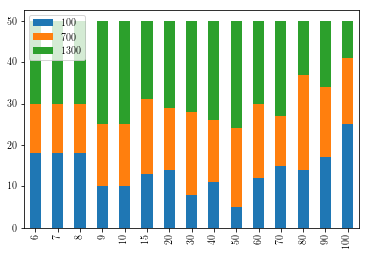

In [45]:
iterations.T.plot(kind = 'bar', stacked = 'True')

In [46]:
iterations.T.plot(kind='bar', stacked='True', title="Best Iterations")
plt.xlabel("%training percentage")

RuntimeError: LaTeX was not able to process the following string:
'%training percentage'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./cc00839ac12746ee8e3bf83d848bd772.tex
LaTeX2e <2015/01/01>
Babel <3.9l> and hyphenation patterns for 79 languages loaded.
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2015/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2015/texmf-dist/tex/latex/was/gensymb.sty)
(/usr/local/texlive/2015/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2015/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2015/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file cc00839ac12746ee8e3bf83d848bd772.aux.
(/usr/local/texlive/2015/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(./cc00839ac12746ee8e3bf83d848bd772.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
No pages of output.
Transcript written on cc00839ac12746ee8e3bf83d848bd772.log.


In [47]:
home = pd.DataFrame(home)

In [48]:
home.T.plot(kind='bar', stacked='True', title="# Home factors")
plt.xlabel("%training percentage")

TypeError: Empty 'DataFrame': no numeric data to plot

In [49]:
season = pd.DataFrame(season)

In [50]:
season.T.plot(kind='bar', stacked='True', title="# Season factors")
plt.xlabel("%training percentage")

TypeError: Empty 'DataFrame': no numeric data to plot

In [51]:
lr = pd.DataFrame(lr)

In [52]:
lr.T.plot(kind='bar', stacked='True', title="Best Iterations",rot=0)
plt.xlabel("%training percentage")

TypeError: Empty 'DataFrame': no numeric data to plot

In [53]:
from plot_functions import format_axes, latexify

KeyError: 'Austin-to-SanDiego'

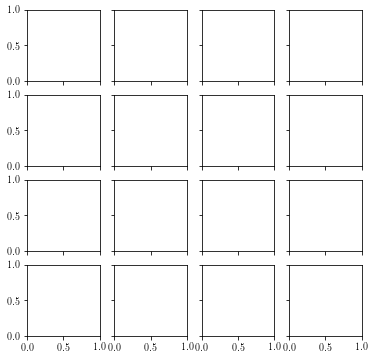

In [54]:
latexify(columns=2, fig_height=6, fig_width=6)
fig, ax = plt.subplots(nrows=4, ncols=4, sharey=True, sharex=True)
idx = 0
for stot in ['Austin-to-SanDiego', 'SanDiego-to-Austin']:
    for method in ['transfer', 'normal']:
        (pd.DataFrame(iterations[stot][method])).T.plot(kind='bar', stacked='True', title="\# Iterations", rot=0, ax=ax[idx, 0])
        pd.DataFrame(season[stot][method]).T.plot(kind='bar', stacked='True', title=r"\# Home factors",ax=ax[idx, 1], rot=0)
        pd.DataFrame(home[stot][method]).T.plot(kind='bar', stacked='True', title=r"\# Season factors", ax=ax[idx, 2],rot=0)
        pd.DataFrame(lr[stot][method]).T.plot(kind='bar', stacked='True', title="Learning rate",rot=0, ax=ax[idx,3])
        idx += 1
n = 3
for a in ax:
    format_axes(a)
ticks = ax[0].xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax[0].xaxis.get_ticklabels()]
ax[0].xaxis.set_ticks(ticks[::n])
ax[0].xaxis.set_ticklabels(ticklabels[::n])
f = fig.text(0.5, -0.1, "\% Adaptation homes")
l = ax[0].set_ylabel("\% instances")
# plt.savefig('../figures/params-Austin-SD.pdf',bbox_inches="tight",bbox_extra_artists=[f, l])

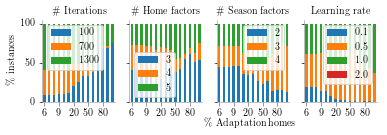

In [39]:
latexify(columns=2, fig_height=1.5, fig_width=6)
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True)
iterations.T.plot(kind='bar', stacked='True', title="\# Iterations", rot=0, ax=ax[0])
home.T.plot(kind='bar', stacked='True', title=r"\# Home factors",ax=ax[1], rot=0)
season.T.plot(kind='bar', stacked='True', title=r"\# Season factors", ax=ax[2],rot=0)
lr.T.plot(kind='bar', stacked='True', title="Learning rate",rot=0, ax=ax[3])
n = 3
for a in ax:
    format_axes(a)
ticks = ax[0].xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax[0].xaxis.get_ticklabels()]
ax[0].xaxis.set_ticks(ticks[::n])
ax[0].xaxis.set_ticklabels(ticklabels[::n])
f = fig.text(0.5, -0.1, "\% Adaptation homes")
l = ax[0].set_ylabel("\% instances")


In [31]:
ticks[::n]

array([0])